### College of Computing and Informatics, Drexel University
### INFO 213: Data Science Programming II, Summer 2018
---

## Final Project Report

## Project Title: Mushroom Classification-Is it poisonous or edible?

## Student(s): Sita Robinson

#### Date: 8/13/18

![](https://img.webmd.com/dtmcms/live/webmd/consumer_assets/site_images/articles/health_tools/all_about_mushrooms_slideshow/493ss_thinkstock_rf_poisonous_mushroom.jpg)
---



#### Abstract
---
*(Briefly summarize the project including the problem, data sets, models, and final findings.)* 

For this project I used the Mushroom Classification dataset from Kaggle.  It was put on Kaggle by the UCI Machine Learning group.  I first started with regular data preparation techniques and went on to exploring the data.  The data is completely categorical and there are 8124 rows and 23 columns.  To prepare the data for use in machine learning models, I had to map these categorical values to numerical values using the labelEncoder function.  Then I split the dataset into test (25%) and train (75%).  The two main classes of mushrooms are poisonous and not poisonous (edible).  The purpose of these models are to predict that.  I used three types of models using scikit learn which are naive bayes, svm (secure vector machines), and logistic regression. The best model was svm and it gave 100% accuracy, the next best model was logistic regression with around 94% accuracy, and finally naive bayes with 81% accuracy.         

### 1. Introduction
---
*(Introduce the project, describe the objectives, and highlight the key findings.)* 

I chose the Mushroom Classification dataset from Kaggle.  The dataset was put on Kaggle by UCI Machine Learning Repository which maintains around 351 datasets.  This dataset is one of those.  The sample set contains around 23 species of mushrooms from the gilled mushroom Agaricus and Lepiota Family.  The mushrooms are either identified as completely poisonous or completely edible.      

#### Objectives 
* Preprocessing and exploratory data analysis steps such as: loading the data into the data frame, checking the shape (number of rows/columns), getting the head of data, checking for missing and duplicate values, etc.  
* Splitting the dataset into test and train.  
* Finding the best sklearn model that accurately predicts whether a mushroom is poisonous or edible using naive bayes, support vector machines, and logistic regression

### 2. Problem Definition
---
*(Define the problem that will be solved in this data analytics project.)*

Poisonous mushrooms can often times confuse people into thinking they are not posionous due to their similar appearance to some non-poisonous mushroom types. Even though most mushrooms seem to be edible, mushroom poisoning can cause discomfort and even in some cases death.  Poisonous mushrooms are found to mostly cause gastrointestinal problems and in the worst case may cause respiratory or kidney failure.  The symptoms appear within twenty minutes to four hours of ingestion. The goal is to find the best model to predict whether a mushroom is poisionous or edible (poisonous or not poisonous).

### 3. Data Sets
---
*(Describe the origin of the data sources. What is the format of the original data? How to access the data?)*

The dataset can be found here: https://www.kaggle.com/uciml/mushroom-classification/home. The format of the data is in a CSV format and is in one single file called mushrooms.csv. To prepare the dataset for classification purposes it needs to be split for the test and train.

### 4. Preparation
---
*(Describe and present any code and methods for cleaning, munging, combining, normalizing, reshaping, slicing and dicing, and transforming data for analysis.)*

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [82]:
df=pd.read_csv('mushrooms.csv')

There are 8124 rows and 23 columns in this dataset.

In [83]:
df.shape

(8124, 23)

Showing first 5 rows of the dataset.  This dataset is comprised of completely categorical features.

In [84]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


Looking at the columns in dataset:

In [85]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

There are no null values in this dataset.

In [86]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

There are no duplicate values in this dataset.

In [87]:
df.duplicated().sum()

0

### 5. Exploration and Visualization
---
*(Describe and present any code and methods for exploring and visualizing the data by analyzing its statistics and correlations between different features.)*

In [88]:
df.nunique()

class                        2
cap-shape                    6
cap-surface                  4
cap-color                   10
bruises                      2
odor                         9
gill-attachment              2
gill-spacing                 2
gill-size                    2
gill-color                  12
stalk-shape                  2
stalk-root                   5
stalk-surface-above-ring     4
stalk-surface-below-ring     4
stalk-color-above-ring       9
stalk-color-below-ring       9
veil-type                    1
veil-color                   4
ring-number                  3
ring-type                    5
spore-print-color            9
population                   6
habitat                      7
dtype: int64

Shows how many unique values there are for each column.

In [89]:
df['class'].unique()

array(['p', 'e'], dtype=object)

The two classes of mushrooms are p (poisonous) and e (edible).

The Kaggle website provides information on what the column data means:
    
**class**: p=poisonous,e=edible  
**cap-shape**: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s                   
**cap-surface**: fibrous=f,grooves=g,scaly=y,smooth=s                 
**cap-color**: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y                   
**bruises**: bruises=t,no=f                      
**odor**: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s                         
**gill-attachment**: attached=a, descending=d, free=f, notched=n              
**gill-spacing**: close=c,crowded=w,distant=d                
**gill-size**: broad=b,narrow=n                 
**gill-color**: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y               
**stalk-shape**: enlarging=e,tapering=t                  
**stalk-root**: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?                  
**stalk-surface-above-ring**: fibrous=f,scaly=y,silky=k,smooth=s    
**stalk-surface-below-ring**: fibrous=f,scaly=y,silky=k,smooth=s     
**stalk-color-above-ring**: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y        
**stalk-color-below-ring**: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y       
**veil-type**: partial=p,universal=u                    
**veil-color**: brown=n,orange=o,white=w,yellow=y                
**ring-number**: none=n,one=o,two=t                 
**ring-type**: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z                    
**spore-print-color**: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y            
**population**: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y                   
**habitat**: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d 

Let's look at the descriptive statistics for the data:

In [90]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


Looking at the number of poisonous and edible mushrooms in this dataset.

In [91]:
df['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

There are more edible mushrooms than poisonous mushrooms 4,208 versus 3,916 in this dataset.

Visualizing number of poisonous and edible mushrooms:

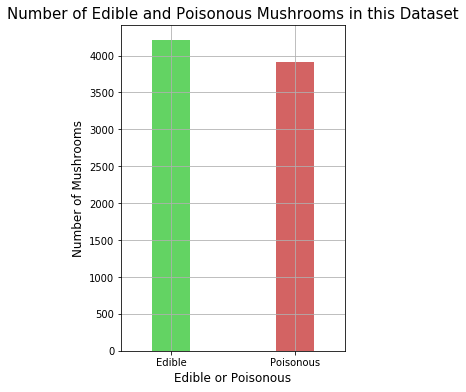

In [92]:
%matplotlib inline
items=pd.DataFrame(df['class'].value_counts())
items.plot(kind='bar', figsize=(4,6), width=0.3, color=[('#63d363', '#d36363')], legend=False)
plt.title("Number of Edible and Poisonous Mushrooms in this Dataset", fontsize="15")
plt.xlabel("Edible or Poisonous", fontsize="12")
plt.ylabel("Number of Mushrooms", fontsize="12")
plt.xticks(np.arange(2),("Edible", "Poisonous"), rotation=0)
plt.grid()   
plt.show()

Looking at the cap-color distribution in this dataset.

In [93]:
df['cap-color'].value_counts()

n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
u      16
r      16
Name: cap-color, dtype: int64

Visualizing number of each cap color:

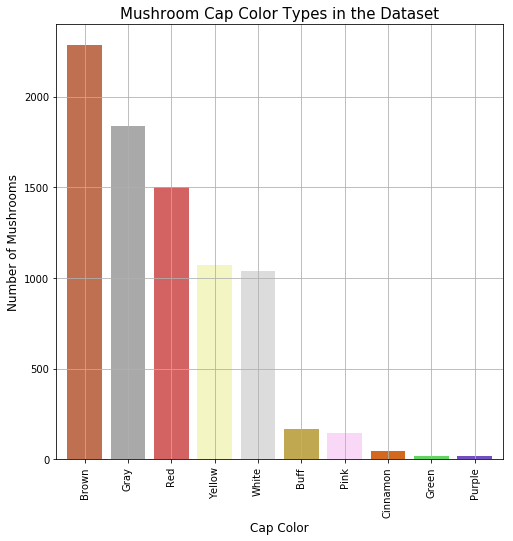

In [94]:
caps=pd.DataFrame(df['cap-color'].value_counts())
caps.plot(kind='bar', figsize=(8,8), width=0.8, color=[('#bf7050', '#A9A9A9', '#d36363', '#f3f6c3', '#DCDCDC', '#bfa850', '#f9d7f7', '#D2691E', '#63d363', '#7050bf')], legend=False)
plt.xlabel("Cap Color",fontsize=12)
plt.ylabel('Number of Mushrooms',fontsize=12)
plt.title('Mushroom Cap Color Types in the Dataset', fontsize=15)
plt.xticks(np.arange(10),('Brown', 'Gray','Red','Yellow','White','Buff','Pink','Cinnamon', 'Green','Purple'))
plt.grid()       
plt.show() 

Looking at the number of mushrooms there are for each cap shape in this dataset.

In [95]:
df['cap-shape'].value_counts()

x    3656
f    3152
k     828
b     452
s      32
c       4
Name: cap-shape, dtype: int64

Visualizing number of each cap shape:

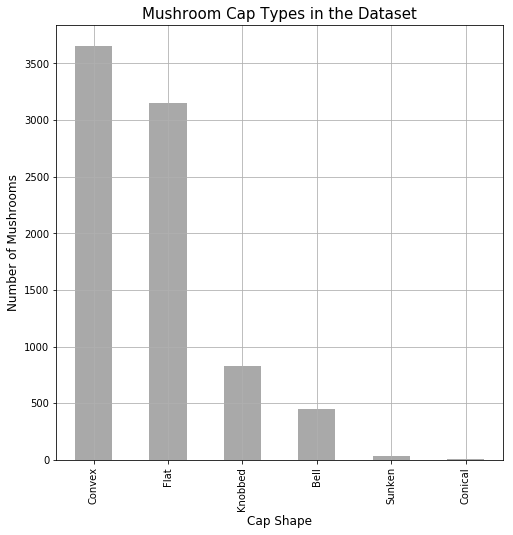

In [96]:
capsh=pd.DataFrame(df['cap-shape'].value_counts())
capsh.plot(kind='bar', figsize=(8,8), width=0.5, color=[('#A9A9A9')], legend=False)
plt.xlabel("Cap Shape",fontsize=12)
plt.ylabel('Number of Mushrooms',fontsize=12)
plt.title('Mushroom Cap Types in the Dataset', fontsize=15)
plt.xticks(np.arange(6),('Convex', 'Flat','Knobbed','Bell','Sunken','Conical'))
plt.grid()       
plt.show() 

### 6. Modeling and Evaluation
---
*(Describe and present the predictive models built on the data and evaluate the performance of the models for solving the problem)*

In [97]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

The sklearn naive bayes algorithm cannot directly operate on categorical features that are non-numeric so we will use sklearn's LabelEncoder to convert the categorical features to numeric values.

In [98]:
# Encodes labels from 0 to n_classes-1
labelEncoder = preprocessing.LabelEncoder()
for col in df.columns:
    df[col] = labelEncoder.fit_transform(df[col])

Let's look at how the LabelEncoder transformed our data.

In [99]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


Now the categorical variables are shown numerically. 

Seeing what labelEncoder did to the poisonous (p) and edible (e) labels.  

In [100]:
df['class'].value_counts()

0    4208
1    3916
Name: class, dtype: int64

Edible is set to 0 and Poisonous is now set to 1.

To prepare the model the dataset needs to be split into test and train.  The method train_test_split randomly splits the dataset into 75% train and 25% test.

In [101]:
# 75% train, 25% test
train, test = train_test_split(df, test_size = 0.25) 
y_train = train['class']
X_train = train[[x for x in train.columns if 'class' not in x]]
y_test = test['class']
X_test = test[[x for x in test.columns if 'class' not in x]]

from sklearn.feature_extraction.text import TfidfVectorizer
# Vectorize the training and test data 
vec = TfidfVectorizer(sublinear_tf=True, max_df=0.5,stop_words='english')

##### Naive Bayes

Scikit-Learn Implementation

In [102]:
from sklearn.naive_bayes import MultinomialNB
# Creating a MultinomialNB classifier and fit the model
cl = MultinomialNB()
cl.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

Now that we have trained our model. Let us predict our labels using the test portion of the data set.

In [103]:
y_pred=cl.predict(X_test)

Now let's evaluate how well the model performs.

In [104]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

print("Accuracy score: ", accuracy_score(y_test, y_pred))
print("Recall score: ", recall_score(y_test, y_pred, average = 'weighted'))
print("Precision score: ", precision_score(y_test, y_pred, average = 'weighted'))
print("F1 score: ", f1_score(y_test, y_pred, average = 'weighted'))

Accuracy score:  0.811422944362
Recall score:  0.811422944362
Precision score:  0.836651263227
F1 score:  0.80666613741


Cross validation is a way to check for overfitting.

In [105]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
scoring = 'accuracy'
results = model_selection.cross_val_score(cl, X_train, y_train, cv=kfold, scoring=scoring)
print("Cross validation average accuracy with 10-folds: %f" % (results.mean()))

Cross validation average accuracy with 10-folds: 0.802556


Given the cross validation average is close to the accuracy of the naive bayes model we can conclude that our model does not really overfit. 

Making a confusion matrix:

In [106]:
from sklearn.metrics import confusion_matrix
import itertools

In [107]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization
[[1001   49]
 [ 334  647]]


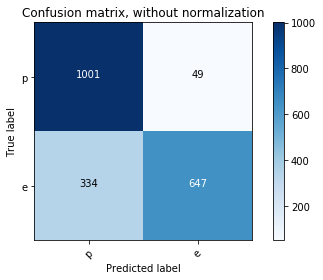

In [108]:
cm = confusion_matrix(y_test, y_pred)
plt.figure()
plot_confusion_matrix(cm, classes=['p','e'], title='Confusion matrix, without normalization')

The matrix below is the same but is normalized.   

Normalized confusion matrix
[[ 0.95333333  0.04666667]
 [ 0.34046891  0.65953109]]


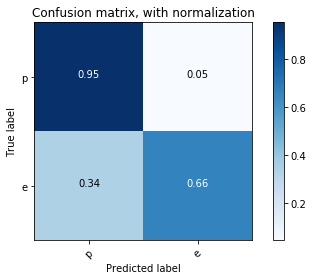

In [109]:
plt.figure()
plot_confusion_matrix(cm, classes=['p','e'], normalize=True, title='Confusion matrix, with normalization')

##### Support Vector Machines (SVM)

Scikit-Learn Implementation

In [110]:
from sklearn import svm

In [111]:
clf = svm.SVC()
clf.fit(X_train, y_train) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [112]:
y_pred=clf.predict(X_test)

Now let's evaluate how well the model performs.

In [113]:
print("Accuracy score: ", accuracy_score(y_test, y_pred))
print("Recall score: ", recall_score(y_test, y_pred, average = 'weighted'))
print("Precision score: ", precision_score(y_test, y_pred, average = 'weighted'))
print("F1 score: ", f1_score(y_test, y_pred, average = 'weighted'))

Accuracy score:  1.0
Recall score:  1.0
Precision score:  1.0
F1 score:  1.0


Cross validation is a way to check for overfitting.

In [114]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
scoring = 'accuracy'
results = model_selection.cross_val_score(clf, X_train, y_train, cv=kfold, scoring=scoring)
print("Cross validation average accuracy with 10-folds: %.3f" % (results.mean()))

Cross validation average accuracy with 10-folds: 1.000


Given the cross validation average is close to the accuracy of the SVM model we can conclude that our model generalizes well and is not overfitting.

In [115]:
from sklearn.metrics import confusion_matrix

The two matrices below show that the SVM model performed with 100% accuracy.  There was nothing inaccurately predicted.

Confusion matrix, without normalization
[[1050    0]
 [   0  981]]


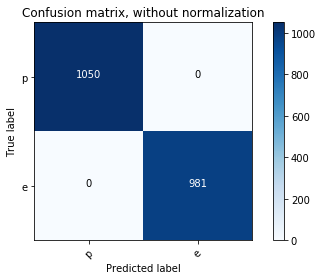

In [116]:
cm = confusion_matrix(y_test, y_pred)
plt.figure()
plot_confusion_matrix(cm, classes=['p','e'], title='Confusion matrix, without normalization')

Normalized matrix:

Normalized confusion matrix
[[ 1.  0.]
 [ 0.  1.]]


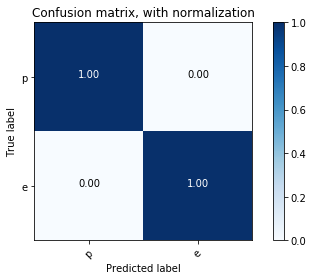

In [117]:
plt.figure()
plot_confusion_matrix(cm, classes=['p','e'], normalize=True, title='Confusion matrix, with normalization')

##### Logistic Regression

Scikit-Learn Implementation

In [118]:
from sklearn import linear_model, datasets
logreg = linear_model.LogisticRegression()

In [119]:
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Now that we have trained our model. Let us predict our labels using the test portion of the data set.

In [120]:
y_pred=logreg.predict(X_test)

Now let's evaluate how well the logistic model performs.

In [121]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

print("Accuracy score: ", accuracy_score(y_test, y_pred))
print("Recall score: ", recall_score(y_test, y_pred, average = 'weighted'))
print("Precision score: ", precision_score(y_test, y_pred, average = 'weighted'))
print("F1 score: ", f1_score(y_test, y_pred, average = 'weighted'))

Accuracy score:  0.949286065977
Recall score:  0.949286065977
Precision score:  0.94944303854
F1 score:  0.949262783837


Cross validation:

In [122]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
scoring = 'accuracy'
results = model_selection.cross_val_score(logreg, X_train, y_train, cv=kfold, scoring=scoring)
print("Cross validation average accuracy with 10-folds: %.3f" % (results.mean()))

Cross validation average accuracy with 10-folds: 0.950


Since the cross validation score is close to the logistic regression model score that means it is not overfitting the data. 

In [123]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

Confusion matrix, without normalization
[[1009   41]
 [  62  919]]


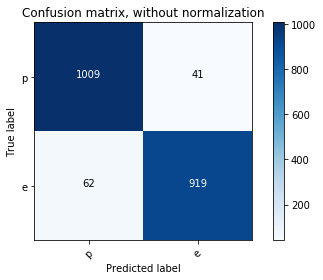

In [124]:
plt.figure()
plot_confusion_matrix(cm, classes=['p','e'], title='Confusion matrix, without normalization')

Same matrix with normalization:

Normalized confusion matrix
[[ 0.96095238  0.03904762]
 [ 0.06320082  0.93679918]]


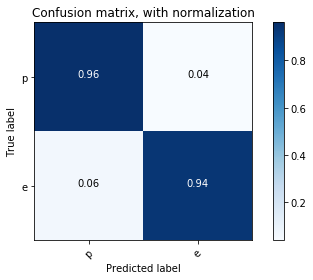

In [125]:
plt.figure()
plot_confusion_matrix(cm, classes=['p','e'], normalize=True, title='Confusion matrix, with normalization')

### 7. Conclusion
---
*(Briefly describe what you have done and what you discovered. Discuss any shortcomings of the process and results. Propose future work. **Finally, discuss the lessons learned from doing the project**.)*

Even though all models did well the best model out of naive bayes, SVM, and logistic regression is SVM.  SVM gave about 100% accuracy while logistic gave about 94% accuracy and naive bayes performed the worst which was around 81% accuracy.  The worst situation seems to be if it is predicted edible but it is actually poisonous.  The other situations are if it is predicted poisonous but is edible, poisonous and is poisonous, edible and is edible.     

### 8. References

https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8

https://www.namyco.org/mushroom_poisoning_syndromes.php

http://scikit-learn.org/stable/index.html